[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/multi-dofs-system.ipynb)

In [24]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from typing import Iterable

# 1 - Introduction

The given ODE we treat here is given by

$$
m\ddot{x} + c\dot{x} +kx = f
$$

With initial conditions $x(0) = x_0$ and $\dot{x}(0) = v_0$.

A helpful notation is

$$
\omega_n = \sqrt{\dfrac{k}{m}} \ \ \ \ \ \ \ \ \ \ \xi = \dfrac{c}{2\sqrt{km}} \ \ \ \ \ \ \ \ \ \ \mu = \sqrt{1-\xi^2}
$$

The solution for this ODE depends on the force $f$.

As it's a linear ODE we can always decompose the solution as

$$
x(t) = x_{h}(t) + x_{f}(t)
$$

Where

* $x_{h}$ represents the homogeneous response
    * $m\ddot{x}_{h} + c\dot{x}_{h} +kx_{h} = 0$
    * $x_{h}(0) = x_0$
    * $\dot{x}_{h}(0) = v_0$
* $x_f$ represents the forced response:
    * If $f=0$ then $x_{f}(t) = 0$
    * $x_{f}(0) = 0$ 
    * $\dot{x}_{f}(0) = 0$

Then, we are going to find the theoric solution for the homogeneous case and the forced solution.

# 2 - Theory

### 2.1 - Homogeneous solution

The homogeneous solution $x_h$ satisfies

$$m\ddot{x}_h + c\dot{x}_h +kx_h = 0$$

With initial conditions

$$
x(0) = x_0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dot{x}(0) = v_0
$$

Then, we can divide the homogeneous solution using two base solutions

$$
x_h(t) = x_0  \cdot x_{p}(t) + v_0  \cdot x_{v}(t)
$$

With

$$
x_p(0) = 1 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dot{x}_p(0) = 0
$$
$$
x_v(0) = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dot{x}_v(0) = 1
$$

There are many ways to solve it. We use Laplace transformation

$$
ms^2 \cdot X + cs \cdot X + kX = m \cdot x(0) + (ms+c) \cdot \dot{x}(0)
$$
$$
X = \underbrace{\dfrac{m}{ms^2 + cs + k}}_{X_{p}} \cdot x(0) + \underbrace{\dfrac{ms+c}{ms^2 + cs + k}}_{X_{v}} \cdot \dot{x}
$$

The solution depends on the parameters $m$, $c$ and $k$, which we divide in three groups:

* If $0\le \xi < 1$
> The solution is given by
> 
> $$x_{p}(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[\cos \mu \omega_n t + \dfrac{\xi}{\mu} \cdot \sin \mu \omega_n t\right]$$
> $$x_{v}(t) = \dfrac{1}{\mu \omega_{n}}\exp \left(-\xi \omega_n t\right) \cdot \sin \mu \omega_n t$$
> Which derivatives are
> 
> $$\dot{x}_p(t) = - \dfrac{\omega_n}{\mu} \cdot \exp \left(-\xi \omega_n t\right) \cdot \sin \mu \omega_n t$$
> $$\dot{x}_v(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[\cos \mu \omega_n t - \dfrac{\xi}{\mu} \cdot \sin \mu \omega_n t\right] $$
> 
* If $\xi = 1$
> The solution is given by
> 
> $$x_{p}(t) = \left(1+\omega_n t\right) \exp \left(- \omega_n t\right) $$
> $$x_{v}(t) = t \cdot \exp \left(-\omega_n t\right)$$
>
> Which derivatives are
>
> $$\dot{x}_p(t) = - \omega_n^2 t \cdot \exp \left(- \omega_n t\right)$$
> $$\dot{x}_v(t) = \left(1-\omega_n t\right) \exp \left(-\xi \omega_n t\right) $$
> 
* If $\xi > 1$
> 
> For this specific case let's say
> $$\mu = \sqrt{\xi^2 - 1}\ \ \ \ \ \ \ \ \ \ \ \ \alpha = \xi - \mu\ \ \ \ \ \ \ \ \ \ \ \ \beta = \xi + \mu$$
> 
> Then, the solution is given by
> 
> $$x_p(t) = \dfrac{1}{2\mu}\left[\beta  \cdot \exp \left(-\alpha \omega_n t\right) - \alpha \cdot \exp \left(-\beta \omega_n t\right)\right]$$
> $$x_v(t) = \dfrac{1}{2\mu\omega_n} \cdot \left[ \exp \left(-\alpha \omega_n t\right) - \exp \left(-\beta \omega_n t\right)\right]$$
>
> Which derivatives are
>
> $$\dot{x}_p(t) = \dfrac{-\alpha\beta \omega_n}{2\mu}  \left[ \exp \left(-\alpha \omega_n t\right) -  \exp \left(-\beta \omega_n t\right)\right]$$
> $$\dot{x}_v(t) = \dfrac{1}{2\mu} \left[ \beta \exp \left(-\beta \omega_n t\right) - \alpha \cdot \exp \left(-\alpha \omega_n t\right) \right] $$

In [25]:
def xp_solution(m: float, c: float, k: float):
    t = sp.symbols("t", real=True)
    wn = np.sqrt(k/m)
    xi = c/np.sqrt(4*m*k)
    mu = np.sqrt(np.abs(1-xi**2))
    if xi < 1:
        func = sp.exp(-xi*wn*t)*(sp.cos(mu*wn*t) + (xi/mu)*sp.sin(mu*wn*t))
    elif xi == 1:
        func = sp.exp(-wn*t)*(1+wn*t)
    else:
        alp = xi - mu
        bet = xi + mu
        func = (bet*sp.exp(-alp*wn*t) - alp*sp.exp(-bet*wn*t))/(2*mu)
    return sp.lambdify(t, func)

def xv_solution(m: float, c: float, k: float):
    t = sp.symbols("t", real=True)
    wn = np.sqrt(k/m)
    xi = c/np.sqrt(4*m*k)
    mu = np.sqrt(np.abs(1-xi**2))
    if xi < 1:
        func = sp.exp(-xi*wn*t)*sp.sin(mu*wn*t)/(mu*wn)
    elif xi == 1:
        func = t*sp.exp(-wn*t)
    else:
        alp = xi - mu
        bet = xi + mu
        func = (sp.exp(-alp*wn*t) - sp.exp(-bet*wn*t))/(2*mu*wn)
    return sp.lambdify(t, func)


def dxp_solution(m: float, c: float, k: float):
    t = sp.symbols("t", real=True)
    wn = np.sqrt(k/m)
    xi = c/np.sqrt(4*m*k)
    mu = np.sqrt(np.abs(1-xi**2))
    if xi < 1:
        func = -wn*sp.exp(-xi*wn*t)*sp.sin(mu*wn*t)/mu
    elif xi == 1:
        func = -wn**2 * t * sp.exp(-wn*t)
    else:
        alp = xi - mu
        bet = xi + mu
        func = -alp*bet*wn*(sp.exp(-alp*wn*t)-sp.exp(-bet*wn*t))/(2*mu)
    return sp.lambdify(t, func)

def dxv_solution(m: float, c: float, k: float):
    t = sp.symbols("t", real=True)
    wn = np.sqrt(k/m)
    xi = c/np.sqrt(4*m*k)
    mu = np.sqrt(np.abs(1-xi**2))
    if xi < 1:
        func = sp.exp(-xi*wn*t)*(sp.cos(mu*wn*t) - (xi/mu)*sp.sin(mu*wn*t))
    elif xi == 1:
        func = sp.exp(-wn*t)*(1-wn*t)
    else:
        alp = xi - mu
        bet = xi + mu
        func = (bet*sp.exp(-bet*wn*t)-alp*sp.exp(-alp*wn*t))/(2*mu)
    return sp.lambdify(t, func)

### 2.2 - Showing homogeneous solution for some $\xi$

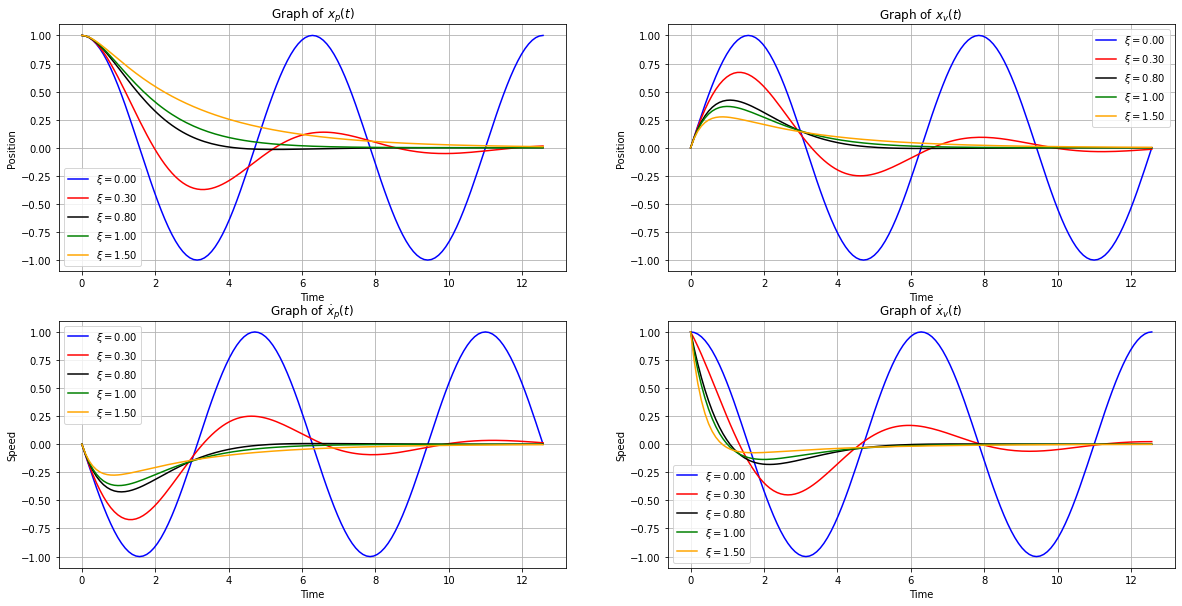

In [26]:
xis = np.array([0, 0.3, 0.8, 1, 1.5])
m = 1
k = 1
colors = ["b", "r", "k", "green", "orange"]
ts = np.linspace(0, 2*2*np.pi, 129)
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for j, xi in enumerate(xis):
    c = 2*xi*np.sqrt(k*m)
    xp = xp_solution(m, c, k)
    xv = xv_solution(m, c, k)
    dxp = dxp_solution(m, c, k)
    dxv = dxv_solution(m, c, k)
    axs[0, 0].plot(ts, xp(ts), color=colors[j], label=r"$\xi=%.2f$"%xi)
    axs[0, 1].plot(ts, xv(ts), color=colors[j], label=r"$\xi=%.2f$"%xi)
    axs[1, 0].plot(ts, dxp(ts), color=colors[j], label=r"$\xi=%.2f$"%xi)
    axs[1, 1].plot(ts, dxv(ts), color=colors[j], label=r"$\xi=%.2f$"%xi)

axs[0, 0].set_ylabel("Position")
axs[0, 1].set_ylabel("Position")
axs[1, 0].set_ylabel("Speed")
axs[1, 1].set_ylabel("Speed")
axs[0, 0].set_title(r"Graph of $x_p(t)$")
axs[0, 1].set_title(r"Graph of $x_v(t)$")
axs[1, 0].set_title(r"Graph of $\dot{x}_p(t)$")
axs[1, 1].set_title(r"Graph of $\dot{x}_v(t)$")
for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel("Time")
        axs[i, j].legend()
        axs[i, j].grid()


### 2.3 - Forced solution

TODO

# 3 - Numerical solution 

### 3.1 - Example and analitical solution for it

For this case we will use specific values of $m$, $c$ and $k$ such

$$
\omega_n = 1 \ \ \ \ \ \ \ \ \ \ \ \ \ \xi = 0.2
$$

It could be any value, but we will show the methods for solve this specific case

In [27]:
m = 1
c = 0.4
k = 1

We are going to apply a sinusoidal force $f$ given by

$$
f(t) = \sin \left( 3 t \right)
$$

In [28]:
def f(t: float, x:float, dx: float) -> float:
    return np.sin(3*t)

And initial conditions given by

$$
x_0 = 0.3 \ \ \ \ \ \ \ \ \ \ \ \ v_0 = -0.2
$$

In [29]:
x0 = 0.3
v0 = -0.2

The analitical solution is given by

$$
x(t) = x_{h}(t) + x_{f}(t)
$$
$$
x_{h}(t) = x_0 \cdot x_p(t) + v_0 \cdot x_v(t)
$$
$$
x_{f}(t) = 
$$

For a numerical solution, we use the total time $T$ and a number of points $n$:

$$
T = 3 \cdot T_{n} = 3 \cdot \dfrac{2\pi}{\omega_n} = 6\pi
$$
$$
npts = 128
$$

In [30]:
T = 6*np.pi
npts = 129
ts = np.linspace(0, T, npts)

### 3.1 - First solution

Queremos encontrar uma equação como

$$
\dot{y} = A \cdot y + B
$$

De modo geral, vamos resolver para o sistema

$$
m \cdot  \ddot{x} + c \cdot \dot{x} + k \cdot x = f(t, \ x, \ \dot{x})
$$

Podemos adicionar mais uma equação identidade que é dada por

$$
\dot{x} = \dot{x}
$$

Reescrevemos a primeira equação usando um parãmetro $\alpha \in \left[0, \ 1\right]$ de forma que

$$
m \cdot \ddot{x} + \alpha \cdot c \cdot \dot{x} = -(1-\alpha) \cdot c \cdot \dot{x} - k \cdot x + f(t, \ x, \ \dot{x})  
$$


De modo que podemos montar o sistema

$$
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix} \cdot 
\begin{bmatrix}
\dot{x} \\
\ddot{x}
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\
-k & (\alpha - 1)c
\end{bmatrix}
\cdot \begin{bmatrix}
x  \\ \dot{x}
\end{bmatrix} + 
\begin{bmatrix}
0 \\ f(t, \ x, \ \dot{x})
\end{bmatrix}
$$

Invertendo a matriz obtemos a equação

$$
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix}^{-1} 
\begin{bmatrix}
0 & 1 \\
-k & (\alpha - 1)c
\end{bmatrix} \cdot 
\begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} + 
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix}^{-1}
\begin{bmatrix}
0 \\ f(t, \ x, \ \dot{x})
\end{bmatrix}
$$

Como uma matrix $2 \times 2$ é facil de encontrar a inversa teremos

$$
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\underbrace{
\begin{bmatrix}
0 & 1 \\
\frac{-k}{m} & \frac{-c}{m}
\end{bmatrix}}_{\left[A\right]} \cdot
\begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} + 
\underbrace{
\begin{bmatrix}
0 \\ \frac{1}{m}f(t, \ x, \ \dot{x})
\end{bmatrix}}_{\left[B\right]}
$$

Vemos que o parâmetro $\alpha$ não influencia nas matrizes $A$ e $B$.

In [31]:
A = np.array([[0, 1], [-k/m, -c/m]])
def B(t: float, x: float, dx: float) -> np.ndarray:
    return np.array([0, f(t, x, dx)])

O primeiro método consiste em utilizar um método ```odeint``` já implementado na biblioteca ```scipy.integrate```.

Teremos então  a função 

$$
\dfrac{dy}{dt} = \left[A\right] \cdot y + \left[B\right]
$$

In [32]:
def dydt(y: np.ndarray, t: float):
    return A @ y + B(t, y[0], y[1])

Com a condição inicial

$$
y_0 = \begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

In [33]:
y0 = [x0, v0]

Resolvemos então usando a função ```odeint```

In [34]:
t = np.linspace(0, T, npts)
Y_num1 = odeint(dydt, y0, t)

O resultado fornecido é $Y$ em que

$$
Y = \begin{bmatrix}
x_{0} & v_{0} \\
x_{1} & v_{1} \\ 
\vdots & \vdots \\
x_{n-1} & v_{n-1}
\end{bmatrix}
$$

Em que é uma aproximação do valor correto, isto é

$$
x_i \approx x(t_i)
$$
$$
v_{i} \approx v(t_i)
$$

Agora mostramos os resultados:

* Para a posição

Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

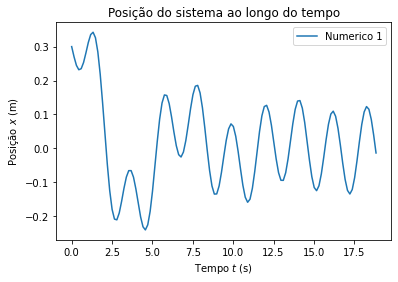

In [35]:
x_num1 = Y_num1[:, 0]
plt.plot(t, x_num1, label="Numerico 1")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

* Para a velocidade

Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

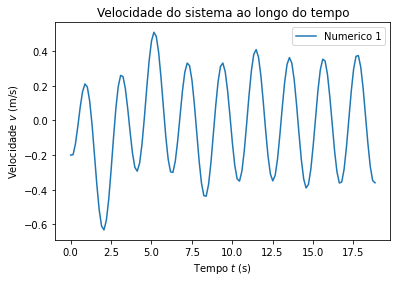

In [36]:
v_num1 = Y_num1[:, 1]
plt.plot(t, v_num1, label="Numerico 1")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

### 3.2 - Second solution

Para essa solução, utilizamos a mesma formulação obtida acima

$$
\dot{y} = A \cdot y
$$

Caso $y$ fosse escalar, teríamos a solução dessa equação como

$$
y = y_0 \cdot \exp \left(At\right)
$$

Com $y_0$ a condição inicial.

Contudo, como $y$ é um vetor e $A$ é uma matriz, então poderiamos supor a solução como

$$
\left[y\right] = \exp \left(\left[A\right] \cdot t\right) \cdot \left[y_0\right]
$$

Nesse sentido, teríamos que definir o exponencial de uma matriz, e essa forma é obtida por expansão em séries de Taylor, isto é

$$
\exp \left(\left[M\right]\right) = \left[I\right] + \dfrac{1}{1!}\left[M\right] + \dfrac{1}{2!}\left[M\right]^2 + \dfrac{1}{3!}\left[M\right]^3 + \cdots
$$

Em que temos multiplicação de matrizes diversas vezes. Computacionamente isso é custoso e então fazemos a decomposição utilizando os auto-valores e auto-vetores.

$$
\left[M\right] = \left[P\right] \cdot \left[\lambda \right] \cdot \left[P\right]^{-1}
$$

O que implica que

$$
\left[M\right]^{n} = \left[P\right] \cdot \left[\lambda \right]^{n} \cdot \left[P\right]^{-1}
$$

E então a soma se torna

$$
\exp \left(\left[M\right]\right) = \sum_{n=0}^{\infty} \dfrac{1}{n!}\left[M\right]^{n} = \sum_{n=0}^{\infty} \dfrac{1}{n!} \left[P\right] \cdot \left[\lambda \right]^{n} \cdot \left[P\right]^{-1}
$$

$$
\exp \left(\left[M\right]\right) = \left[P\right] \left(\sum_{n=0}^{\infty} \dfrac{1}{n!} \left[\lambda^{n}\right]\right) \left[P\right]^{-1} = \left[P\right] \left[\sum_{n=0}^{\infty} \dfrac{1}{n!} \lambda^{n}\right] \left[P\right]^{-1} 
$$

$$
\exp \left(\left[M\right]\right) = \left[P\right] \cdot \left[\exp \left(\lambda\right) \right] \cdot \left[P\right]^{-1}
$$

No caso, a matriz $\left[M\right]$ é a matriz $\left[A\right] \cdot t$.
Sendo $\lambda_{1}$ e $\lambda_2$ os autovalores de $\left[A\right]$, os auto-valores de $\left[M\right]$ são $(t \cdot \lambda_1)$ e $(t\cdot \lambda_2)$ de forma que

$$
\exp \left(t \left[A\right]\right) = \left[P\right] \cdot \begin{bmatrix} \exp(t\lambda_1) & \\ & \exp(t\lambda_2) \end{bmatrix} \cdot \left[P\right]^{-1}
$$

E portando a solução geral é

$$
\left[y\right] = \left[P\right] \cdot \begin{bmatrix} \exp(t\lambda_1) & \\ & \exp(t\lambda_2) \end{bmatrix} \cdot \left[P\right]^{-1} \cdot \left[y_0\right]
$$

Como sabemos, os auto-valores de $\left[A\right]$ são dados por

$$
\det \left(\left[A\right] - \lambda \left[I\right]\right) = \det \left(\begin{bmatrix} -\lambda & 1 \\ -\frac{k}{m} & -\frac{c}{m} - \lambda \end{bmatrix}\right) = \lambda \left(\lambda + \frac{c}{m}\right) + \frac{k}{m}= 0
$$

A solução dessa equação é

$$
\lambda = \dfrac{-c}{2m} \pm \sqrt{\dfrac{c^2}{m^2} - \dfrac{4k}{m}}
$$

Em termos de $\xi$ e $\omega_n$ é

$$
\lambda = \omega_n\left(-\xi \pm \sqrt{\xi^2 - 1}\right)
$$

In [37]:
A = np.array([[0, 1],
              [-k/m, -c/m]])
lams, P = np.linalg.eig(A)
print("Auto valores: ")
for i, lam in enumerate(lams):
    print("lambda%d = %s" % (i, str(lam)))
print("Auto vetores:")
for i in range(len(lams)):
    vi = P[:, i]
    print("v%d = %s" % (i, vi))
Pinv = np.linalg.inv(P)

Auto valores: 
lambda0 = (-0.20000000000000004+0.9797958971132713j)
lambda1 = (-0.20000000000000004-0.9797958971132713j)
Auto vetores:
v0 = [ 0.70710678+0.j         -0.14142136+0.69282032j]
v1 = [ 0.70710678-0.j         -0.14142136-0.69282032j]


In [38]:
Y_num2 = np.zeros((npts, 2))
for i in range(npts):
    Matrix = P @ np.diag(np.exp(t[i] * lams)) @ Pinv
    Y_num2[i] = np.real(Matrix) @ y0 

Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

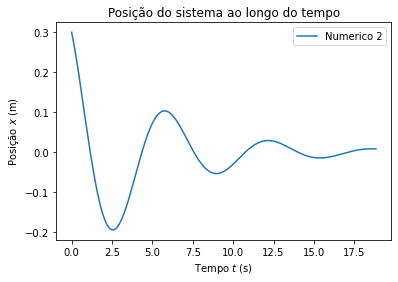

In [39]:
x_num2 = Y_num2[:, 0]
plt.plot(t, x_num2, label="Numerico 2")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

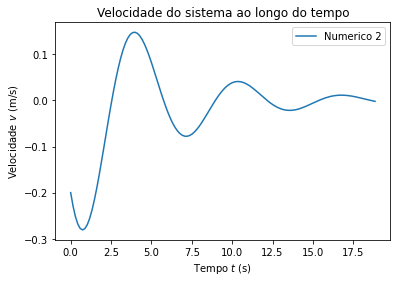

In [40]:
v_num2 = Y_num2[:, 1]
plt.plot(t, v_num2, label="Numerico 2")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

### 3.3 - Third solution

Para a terceira solução, pegamos as **Diferenças Finitas Generalizadas**.

Sejam $\alpha$, $\beta$ e $\gamma$ parâmetros no intervalo $\left[0, \ 1 \right] \subset \mathbb{R}$, tais que

$$
v_{i+\alpha} = (1-\alpha) \cdot v_{i} + \alpha \cdot v_{i+1}
$$

$$
a_{i+\beta} = (1-\beta) \cdot a_{i} + \beta \cdot a_{i+1}
$$

$$
a_{i+\gamma} = (1-\gamma) \cdot a_{i} + \gamma \cdot a_{i+1}
$$

Então definimos o próximo passo $(x_{i+1}, \ v_{i+1})$ utilizando:

$$
x_{i+1} = x_{i} + \Delta t \cdot v_{i+\alpha} + \dfrac{1}{2}\Delta t ^2 \cdot a_{i+\beta} 
$$

$$
v_{i+1} = v_{i} + \Delta t \cdot a_{i+\gamma}
$$

Como o termo da força é nulo, podemos montar apenas

$$
a_{i} + \dfrac{c}{m} v_{i} + \dfrac{k}{m} x_{i} = 0
$$

$$
a_{i+1} + \dfrac{c}{m} v_{i+1} + \dfrac{k}{m} x_{i+1} = 0
$$

A equação da posição

$$
x_{i+1} - \alpha \Delta t v_{i+1} - \dfrac{1}{2} \beta \Delta t^2 a_{i+1} = x_{i} + \Delta t \left(1-\alpha\right) v_i + \dfrac{1}{2}(1-\beta)\Delta t^2 a_{i}
$$
$$
x_{i+1} - \alpha \Delta t \cdot v_{i+1} + \dfrac{1}{2}\beta \Delta t^2 \left(\dfrac{k}{m}x_{i+1} + \dfrac{c}{m}v_{i+1}\right) = x_{i} + \Delta t(1-\alpha) v_{i} - \dfrac{1}{2}(1-\beta) \Delta t^2 \left(\dfrac{k}{m}x_{i} + \dfrac{c}{m}v_{i}\right)
$$

$$
\begin{bmatrix}
1 + \dfrac{\beta k \Delta t^2}{2m} & -\alpha \Delta t + \dfrac{\beta c \Delta t^2}{2m}
\end{bmatrix} \begin{bmatrix}
x_{i+1} \\ v_{i+1} \end{bmatrix} = \begin{bmatrix}
1 - \dfrac{(1-\beta) k \Delta t^2}{2m} & (1-\alpha) \Delta t - \dfrac{(1-\beta) c \Delta t^2}{2m}
\end{bmatrix} \begin{bmatrix}
x_{i} \\ v_{i} \end{bmatrix} 
$$

E a equação da velocidade

$$
v_{i+1} - \gamma  \Delta t a_{i+1} = v_{i} + (1-\gamma) \Delta t a_{i} 
$$
$$
v_{i+1} + \gamma \Delta t \left(\dfrac{k}{m}x_{i+1} + \dfrac{c}{m} v_{i+1}\right) = v_{i} - (1-\gamma) \Delta t \left(\dfrac{k}{m}x_{i} + \dfrac{c}{m} v_{i}\right)
$$

$$
\begin{bmatrix}
\dfrac{\gamma k \Delta t}{m} & 1 + \dfrac{\gamma c \Delta t}{m} 
\end{bmatrix} \begin{bmatrix}
x_{i+1} \\ v_{i+1}
\end{bmatrix} = 
\begin{bmatrix}
\dfrac{-(1-\gamma) k \Delta t}{m} & 1 - \dfrac{(1-\gamma) c \Delta t}{m} 
\end{bmatrix} \begin{bmatrix}
x_{i} \\ v_{i}
\end{bmatrix}
$$

Então com as duas equações de forma matricial podemos montar


$$
\left[M_{1}\right] \begin{bmatrix}
x_{i+1} \\ v_{i+1}\end{bmatrix} = 
\left[M_{0}\right] \begin{bmatrix}
x_{i} \\ v_{i}\end{bmatrix}
$$

Em que

$$
\left[M_{0}\right] = \begin{bmatrix}
1 - \frac{1}{2}(1-\beta)\frac{k}{m} \Delta t^2 & (1-\alpha) \Delta t - \frac{1}{2}(1-\beta) \frac{c}{m}\Delta t^2 \\
- (1-\gamma) \frac{k}{m} \Delta t & 1 - (1-\gamma)\frac{c}{m}\Delta t
\end{bmatrix}
$$

$$
\left[M_{1}\right] = 
\begin{bmatrix}
1 + \frac{1}{2}\beta \frac{k}{m} \Delta t^2 & -\alpha \Delta t + \frac{1}{2}\beta \frac{c}{m} \Delta t^2 \\
\gamma \frac{k}{m} \Delta t & 1 + \gamma \frac{c}{m} \Delta t
\end{bmatrix}
$$

In [41]:
def getM0(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M0 = np.copy(np.eye(2))
    M0[0, 0] -= (1-beta)*km*(dt**2)/2
    M0[0, 1] += (1-alpha)*dt
    M0[0, 1] -= (1-beta)*cm*(dt**2)/2
    M0[1, 0] -= (1-gamma)*km*dt
    M0[1, 1] -= (1-gamma)*cm*dt
    return M0

def getM1(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M1 = np.copy(np.eye(2))
    M1[0, 0] += beta*km*(dt**2)/2
    M1[0, 1] -= alpha*dt 
    M1[0, 1] += beta*cm*(dt**2)/2
    M1[1, 0] += gamma*km*dt
    M1[1, 1] += gamma*cm*dt
    return M1

Caso $\Delta t$ seja sempre constante, é necessário calcular $M_0$ e $M_1$ apenas uma vez, de forma que fica eficiente calcular a matriz de iteração $W$:

$$
\begin{bmatrix}
x_{i+1} \\ v_{i+1}
\end{bmatrix} = 
\underbrace{\left(\left[M_1\right]^{-1} \cdot \left[M_0\right]\right) }_{\left[W\right]}
\begin{bmatrix}
x_{i} \\ v_{i}
\end{bmatrix}
$$

Os melhores valores de $\alpha$, $\beta$ e $\gamma$ depende dos valores dos valores de $\xi$ e $\omega_{n}$. Contudo, de forma geral colocamos

$$
\alpha = 0
$$
$$
\beta = \begin{cases}
\frac{1}{6} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{se} \ \xi < 0.2 \\
\frac{55}{84} \xi + \frac{1}{28}  \ \ \ \ \ \ \text{se} \ \ 0.2 < \xi < 0.6\\
\frac{3}{7} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{se} \ 0.6 < \xi
\end{cases}
$$
$$
\gamma = 0.5
$$

In [42]:
def getW(m, c, k, dt, alpha = None, beta = None, gamma = None):
    if alpha is None:
        alpha = 0.0
    if beta is None:
        if xi < 0.2:
            beta = 1/6
        elif xi < 0.6:
            beta = (1/28) + (55*xi/84)
        else:
            beta = 3/7
    if gamma is None:
        gamma = 0.5
    M0 = getM0(m, c, k, dt, alpha, beta, gamma)
    M1 = getM1(m, c, k, dt, alpha, beta, gamma)
    return np.linalg.inv(M1) @ M0

In [43]:
dt = t[1]-t[0]
W = getW(m, c, k, dt)

E então resolvemos

In [44]:
Y_num3 = np.zeros((npts, 2))
Y_num3[0] = [x0, v0]
for i in range(1, npts):
    Y_num3[i] = W @ Y_num3[i-1]

Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

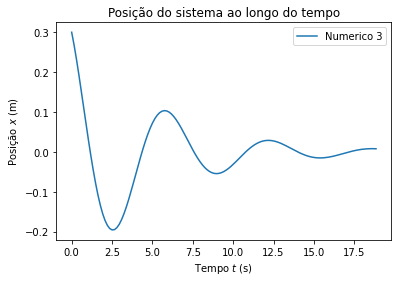

In [45]:
x_num3 = Y_num3[:, 0]
plt.plot(t, x_num3, label="Numerico 3")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

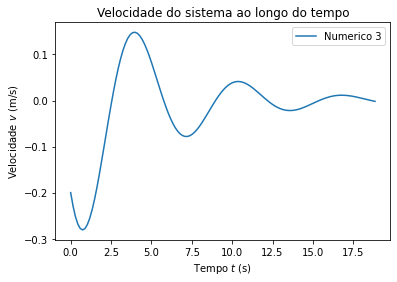

In [46]:
v_num3 = Y_num3[:, 1]
plt.plot(t, v_num3, label="Numerico 3")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")